In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Cleaned_Emp_dataset.csv")


In [3]:
df.head() 

,EmployeeID,Name,Age,Department,Salary,JoiningDate,Experience,SalaryLevel,ageGroup
0,1001,David Khan,58,IT,50000.0,Not Available,Not Available,Medium,senior
1,1002,Mary Jones,41,IT,50000.0,2020-03-22 00:00:00,5.0,Medium,MId
2,1004,John Khan,41,IT,50000.0,2017-07-30 00:00:00,8.0,Medium,MId
3,1005,Jane Doe,40,Unknown,50000.0,2021-06-12 00:00:00,4.0,Medium,MId
4,1006,Steve Green,41,IT,50000.0,2020-03-22 00:00:00,5.0,Medium,MId


In [4]:
df.tail()

,EmployeeID,Name,Age,Department,Salary,JoiningDate,Experience,SalaryLevel,ageGroup
963,1278,Mary Smith,57,Marketing,50000.0,2017-07-30 00:00:00,8.0,Medium,senior
964,1925,Mary Khan,41,Unknown,50000.0,2021-06-12 00:00:00,4.0,Medium,MId
965,1602,Sara Wong,41,Unknown,50000.0,2017-07-30 00:00:00,8.0,Medium,MId
966,1440,Steve Wong,41,HR,50000.0,2017-07-30 00:00:00,8.0,Medium,MId
967,1838,Jane Khan,41,HR,71125.0,2019-01-15 00:00:00,6.0,high,MId


In [5]:
df.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 968 entries, 0 to 967
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   EmployeeID   968 non-null    int64  
 1   Name         968 non-null    object 
 2   Age          968 non-null    int64  
 3   Department   968 non-null    object 
 4   Salary       968 non-null    float64
 5   JoiningDate  968 non-null    object 
 6   Experience   968 non-null    object 
 7   SalaryLevel  968 non-null    object 
 8   ageGroup     968 non-null    object 
dtypes: float64(1), int64(2), object(6)
memory usage: 68.2+ KB


In [6]:
df.describe() 

,EmployeeID,Age,Salary
count,968.000000,968.000000,968.000000
mean,1504.940083,40.819215,53775.052686
std,287.502037,6.798120,9261.556463
min,1001.000000,20.000000,50000.000000
25%,1259.750000,41.000000,50000.000000
50%,1507.500000,41.000000,50000.000000
75%,1754.250000,41.000000,50000.000000
max,2000.000000,59.000000,89402.000000


In [7]:
df.shape

(968, 9)

In [8]:
df.columns

Index(['EmployeeID', 'Name', 'Age', 'Department', 'Salary', 'JoiningDate',
       'Experience', 'SalaryLevel', 'ageGroup'],
      dtype='object')

In [9]:
df.isnull().sum()

EmployeeID     0
Name           0
Age            0
Department     0
Salary         0
JoiningDate    0
Experience     0
SalaryLevel    0
ageGroup       0
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(43)

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
df.nunique() 

EmployeeID     918
Name           101
Age             40
Department       6
Salary         174
JoiningDate      5
Experience       5
SalaryLevel      2
ageGroup         3
dtype: int64

In [14]:
df['SalaryLevel'].unique()

array(['Medium', 'high'], dtype=object)

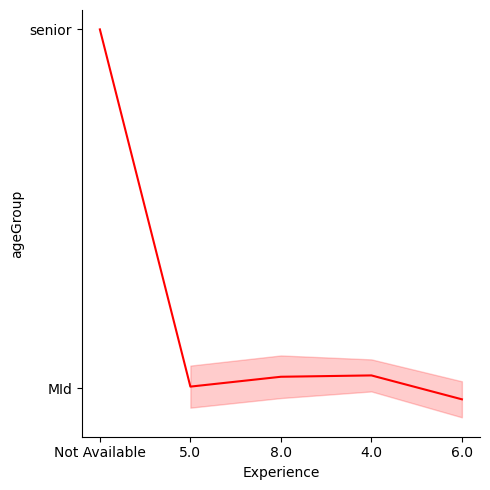

In [15]:
sns.relplot(x="Experience",y="ageGroup",data=df,kind="line",color='Red')
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

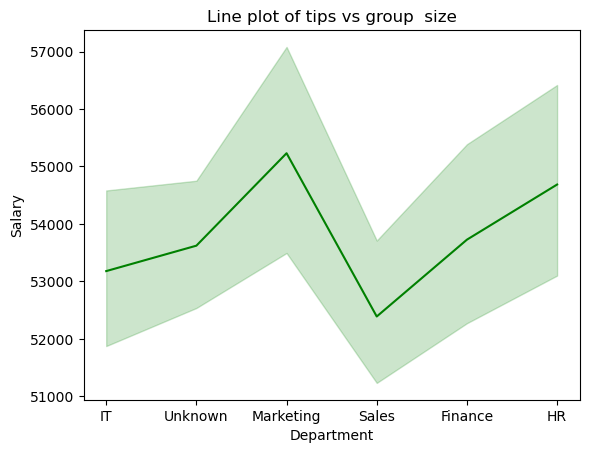

In [16]:
sns.lineplot(
    x="Department",
    y="Salary",
    data=df,
    color='Green'
)
plt.title("Line plot of tips vs group  size")
plt.show

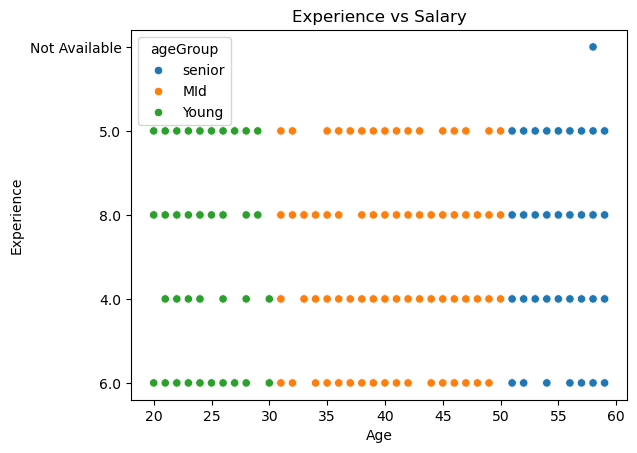

In [17]:
sns.scatterplot(y='Experience', x='Age', hue='ageGroup',color='Red',data=df)
plt.title("Experience vs Salary")
plt.show()

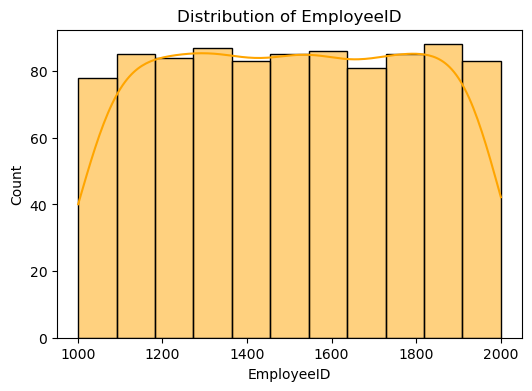

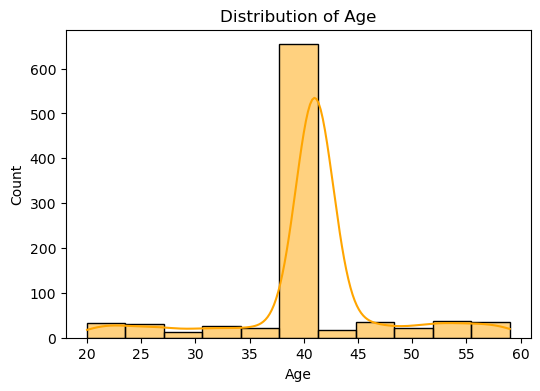

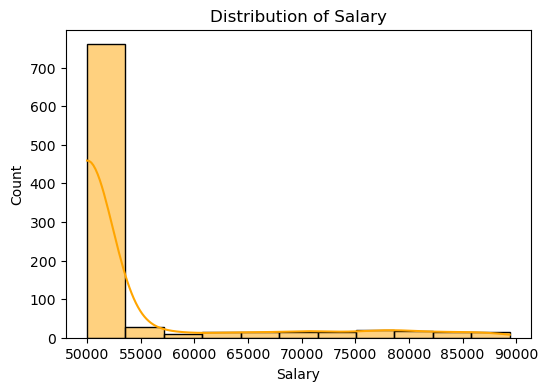

In [18]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], color='Orange',kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

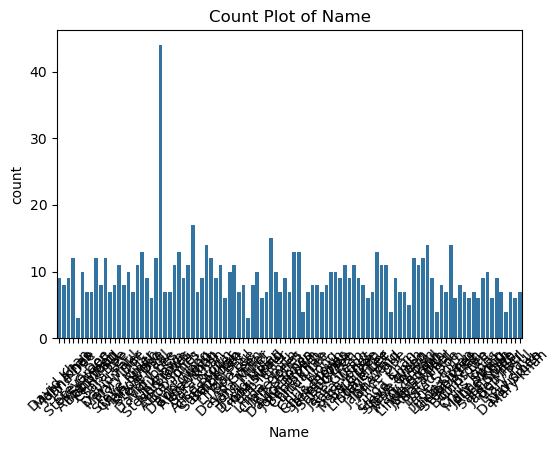

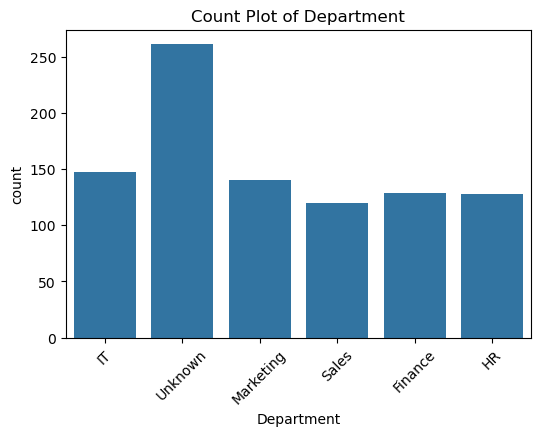

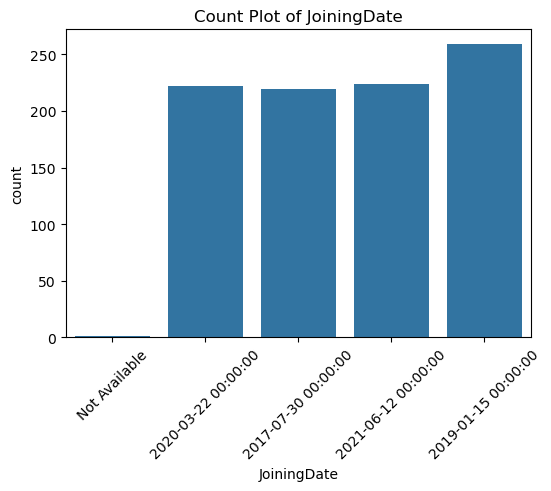

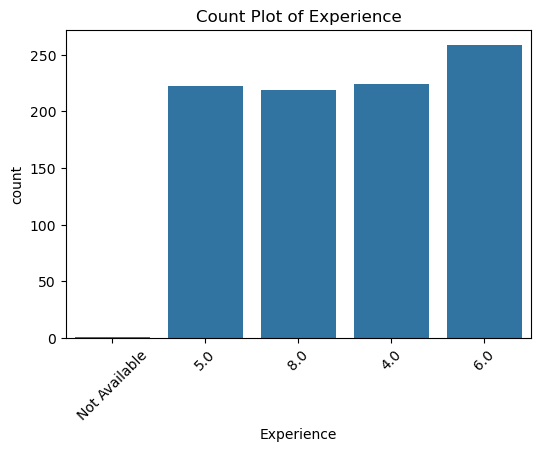

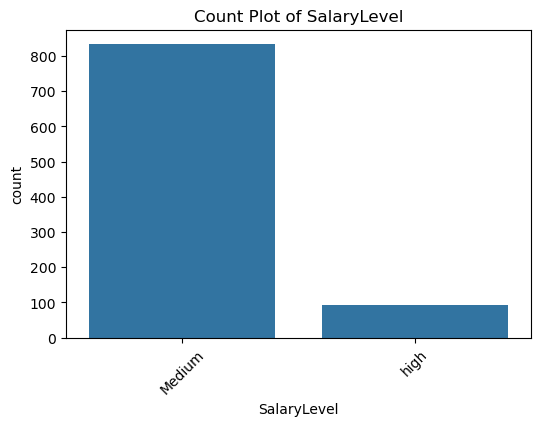

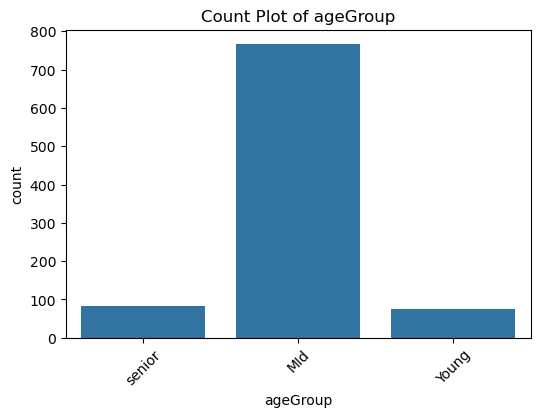

In [19]:
cat_cols = df.select_dtypes(include=['object']).columns

for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=df[col])
    plt.title(f'Count Plot of {col}')
    plt.xticks(rotation=45),
    plt.show()

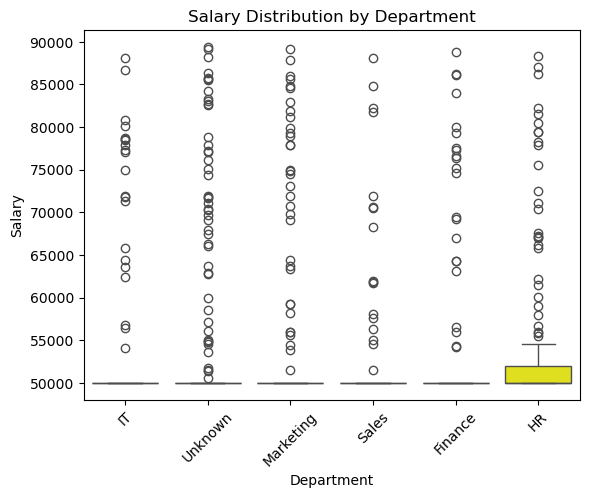

In [20]:
sns.boxplot(x='Department', y='Salary', color='Yellow',data=df)
plt.title("Salary Distribution by Department")
plt.xticks(rotation=45)
plt.show()

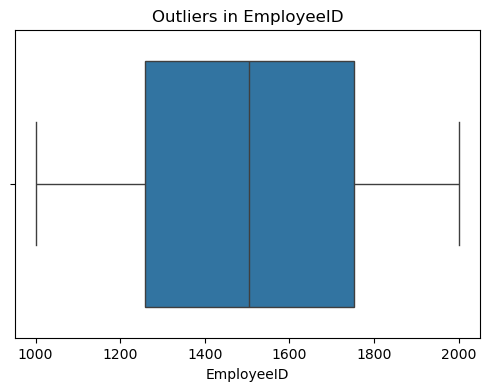

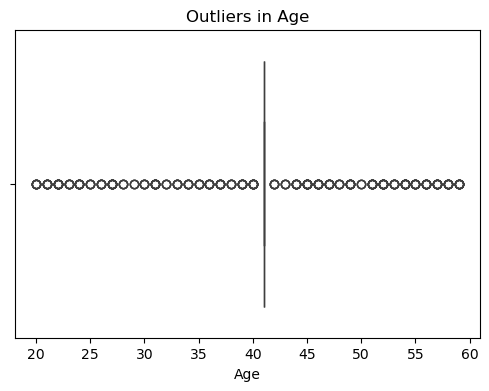

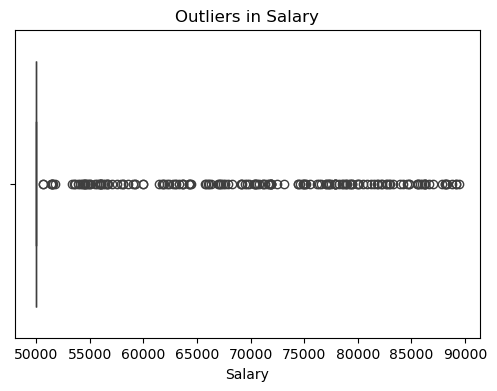

In [21]:
for col in num_cols:
    plt.figure(figsize=(6,4),)
    sns.boxplot(x=df[col])
    plt.title(f'Outliers in {col}')
    plt.show()


<Axes: >

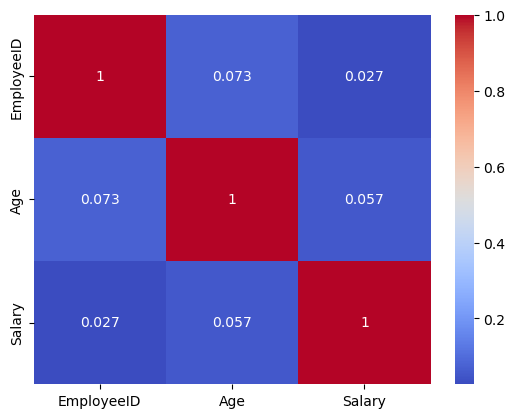

In [22]:
corr=df.corr(numeric_only = True)
sns.heatmap(corr,annot= True,cmap="coolwarm")

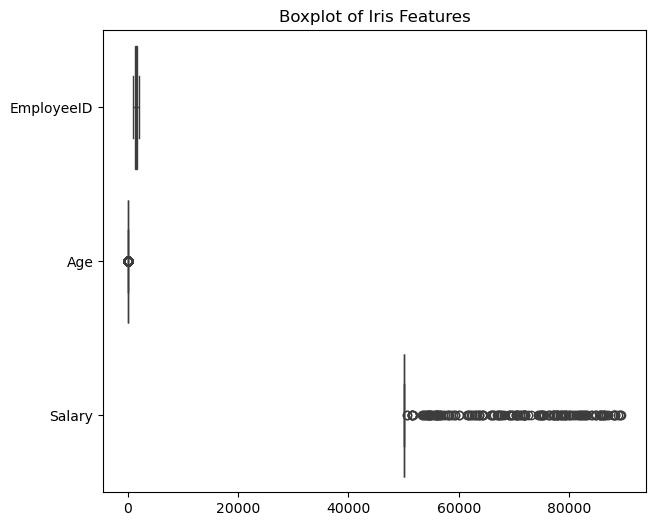

In [27]:
plt.figure(figsize=(7,6))
sns.boxplot(data=df,color='Red', orient='h')
plt.title("Boxplot of Iris Features")
plt.show()

In [24]:
print(df.mean(numeric_only=True))

EmployeeID     1503.532973
Age              40.861622
Salary        53796.474595
dtype: float64


In [25]:
df.groupby('Department')['Salary'].mean().sort_values(ascending=False)

Department
Marketing    55230.921429
HR           54685.796875
Finance      53725.775194
Unknown      53621.279693
IT           53178.612245
Sales        52388.275000
Name: Salary, dtype: float64

# SAVE DATASET

In [26]:
df.to_csv("Clean_EMPED_datase.csv", index=False)